# Span and Linear Independence

## Outine
- Introduction to Span and Linear Independence
- Span
- Linear Independence
- Wrap up

  
## Introduction to Span and Linear Independence
 
The span of a set of vectors is a set that represents all linear combinations of the vectors. 

Given a set of vectors, you can determine if they are linearly independent by writing the vectors
as the columns of the matrix A, and solving ``Ax = 0``. If there are any non-zero solutions, then the
vectors are **linearly dependent**. If the only solution is ``x = 0``, then they are **linearly independent**.

Linearly independent sets are vital in linear algebra because a set of **N linearly independent vectors defines an N dimensional space**. These vectors are said to **span** the space. Any **point** in the space can be described as some **linear combination of those N vectors**.


## Span

The span is a 2 dimensional plane passing through points in the coordinate space.

The explaination retrieved from: https://dsfabric.org/intermediates-of-linear-algebra-with-python-part-i provides a good reference.

<img src="images/span_definition.png" width="500">

Let's look at an example of the span of A = {a<sub>1</sub>, a<sub>2</sub>} in R<sup>3</sup>:


In [2]:
!pip install scipy

     |████████████████████████████████| 30.7 MB 8.5 MB/s eta 0:00:01


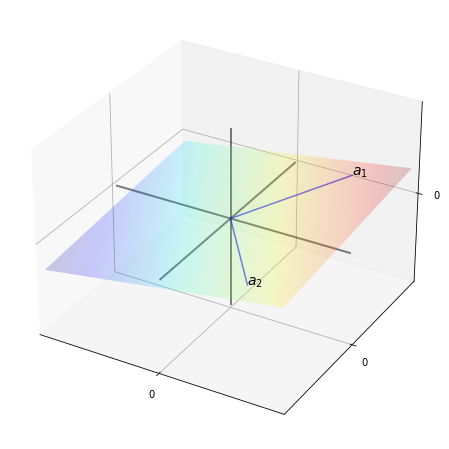

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp2d

fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')

x_min, x_max = -5, 5
y_min, y_max = -5, 5

a, b = 0.2, 0.1
ax.set(xlim=(x_min, x_max), ylim=(x_min, x_max), zlim=(x_min, x_max), xticks=(0, ), yticks=(0, ), zticks=(0, ))
gs = 3

z = np.linspace(x_min, x_max, gs)
y = np.zeros(gs)
x = np.zeros(gs)

ax.plot(x, y, z, 'k-', lw=2, alpha=0.5)
ax.plot(z, x, y, 'k-', lw=2, alpha=0.5)
ax.plot(y, z, x, 'k-', lw=2, alpha=0.5)

# Linear function to generate plane
def f(x, y):
    return a*x + b*y

# Set vector coordinates
x_coords = np.array((3,3))
y_coords = np.array((4,-4))
z = f(x_coords, y_coords)

for i in (0,1):
    ax.text(x_coords[i], y_coords[i], z[i], f'$a_{i+1}$', fontsize=14)

# We need to draw lines from origin to the vectors
for i in (0,1):
    x = (0, x_coords[i])
    y = (0, y_coords[i])
    z = (0, f(x_coords[i], y_coords[i]))
    ax.plot(x, y, z, 'b-', lw=1.5, alpha=0.6)

# As we already draw axes and vectors, it's time to plot the plane
grid_size = 50
xr2 = np.linspace(x_min, x_max, grid_size)
yr2 = np.linspace(y_min, y_max, grid_size)

x2, y2 = np.meshgrid(xr2, yr2)
z2 = f(x2, y2)

ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=True, alpha=0.2)
plt.show()

## Linear Independence

**Dependence** in systems of linear equations means that two of the equations refer to the same line. There is an infinite number of solutions that will satisfy the conditions of the equations! To know which solution you want, you have to feed in an x value. This makes the y value dependent on the x value.

**Independence** in systems of linear equations means that the two equations only meet at one point. There is only **one point** in the entire universe that will solve both equations at the same time. It's the intersection between the two lines.

<img src="images/linear_independence.png" width="500">

In [16]:
# Import Numpy library
import numpy as np
import scipy.linalg as la

# use the equations y= 2x + 1 or (2x-y=-1)and y = 6x - 2 or (6x-y=2)
# the result has one point that solves both equations, thus they are independent

# create the x,y vectors
A = np.array([[2,-1],[6,-1]])
print (A)

# create the result vector
b = np.array([-1,2]).reshape((-1,1))
print (b)

# use the solve function to 
x = la.solve(A,b)
print(x)

# are the equations independent?
np.allclose(A @ x, b)


[[ 2 -1]
 [ 6 -1]]
[[-1]
 [ 2]]
[[0.75]
 [2.5 ]]


True

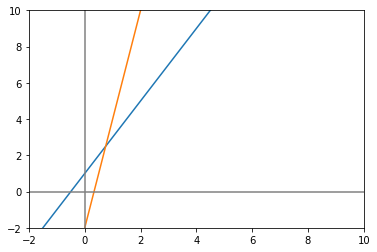

In [17]:
import matplotlib.pyplot as plt

# graph the equations y = 2x + 1 and y = 6x - 2
# the result has one point that solves both equations, thus they are independent
# we see this visualy

x = np.arange(-10, 10)
y = 2*x + 1
y1 = 6*x - 2

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='gray')
plt.axhline(y=0, color='gray')
plt.show()
plt.close()

## Wrap up
We discussed:
- Introduction to Span and Linear Independence
- Span
- Linear Independence